# Load data

In [1]:
from keras.datasets import mnist
from PIL import Image
import numpy as np
from keras.utils import to_categorical
from sklearn.utils import shuffle
import time
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
from keras import optimizers
from keras import backend as K
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
# --------------------- processing data ----------------------
# loading data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
num_classes = 10

# form one hot label
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

def resize_image(data):
    img = Image.fromarray(data.reshape(28,28))
    img = img.resize(size=(32,32))
    return np.array(img)

# preprocessing: resize to 32,32. scale to [0,1]
X_train = np.array([resize_image(x) for x in X_train])
X_test = np.array([resize_image(x) for x in X_test])




# Build NN

In [10]:
# ------------------- create model -------------------
img_rows, img_cols = 32, 32
def build_model(regulaizer=None):
    model = Sequential()
    # add model layers


    # 32, 32
    channel_multiply = 4

    model.add(Conv2D(1 * channel_multiply, (3, 3), activation='relu', padding='same',
                     input_shape=(32,32,1), kernel_regularizer=regulaizer))
    # 32, 32
    model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
    # 16, 16
    model.add(Conv2D(2 * channel_multiply, (3, 3), activation='relu', padding='same',
                     kernel_regularizer=regulaizer))
    # 16, 16
    model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
    # 8, 8
    model.add(Conv2D(4 * channel_multiply, (3, 3), activation='relu', padding='same',
                     kernel_regularizer=regulaizer))
    # 8, 8
    model.add(Conv2D(4 * channel_multiply, (3, 3), activation='relu', padding='same',
                     kernel_regularizer=regulaizer))
    # 8, 8
    model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
    # 4, 4
    model.add(Conv2D(8 * channel_multiply, (3, 3), activation='relu', padding='same',
                     kernel_regularizer=regulaizer))
    # 4, 4
    model.add(Conv2D(8 * channel_multiply, (3, 3), activation='relu', padding='same',
                     kernel_regularizer=regulaizer))
    # 4, 4
    model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
    # 2, 2
    model.add(Conv2D(8 * channel_multiply, (3, 3), activation='relu', padding='same',
                     kernel_regularizer=regulaizer))
    # 2, 2
    model.add(Conv2D(8 * channel_multiply, (3, 3), activation='relu', padding='same',
                     kernel_regularizer=regulaizer))
    # 2, 2
    model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
    # 1, 1
    model.add(Flatten())
    model.add(Dense(4 * channel_multiply, kernel_regularizer=regulaizer))
    model.add(Dense(4 * channel_multiply, kernel_regularizer=regulaizer))
    # model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))

    return(model)

In [5]:
# plot
def plot_img(Y1, Y2, title):
    plt.clf()
    plt.plot(Y1)
    plt.plot(Y2)
    plt.title(title)
    plt.ylabel(title)
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.savefig(title + '.png')



Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 18s 368us/step - loss: 1.7438 - acc: 0.4866 - val_loss: 1.2336 - val_acc: 0.6652
Epoch 2/5
48000/48000 [==============================] - 17s 365us/step - loss: 1.1130 - acc: 0.7322 - val_loss: 1.0057 - val_acc: 0.7752
Epoch 3/5
48000/48000 [==============================] - 17s 364us/step - loss: 0.9016 - acc: 0.8181 - val_loss: 0.8370 - val_acc: 0.8421
Epoch 4/5
48000/48000 [==============================] - 17s 364us/step - loss: 0.7741 - acc: 0.8676 - val_loss: 0.7513 - val_acc: 0.8766
Epoch 5/5
48000/48000 [==============================] - 18s 365us/step - loss: 0.6984 - acc: 0.8948 - val_loss: 0.6693 - val_acc: 0.9028
0.8948125 	 0.6983858178853989 	 0.9028333333333334 	 0.6693470759391784


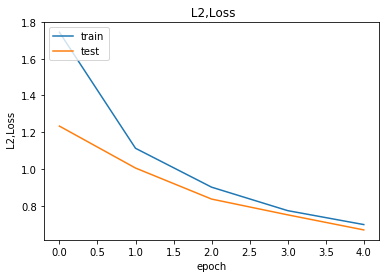

In [40]:
model = build_model(regulaizer=keras.regularizers.l2(0.01))
sgd = optimizers.SGD(lr=1e-8, decay=1e-6, momentum=0.9, nesterov=True)
adam = optimizers.Adamax(lr=1e-3, beta_1=0.9, beta_2=0.999, epsilon=None, decay=1e-5)
ada = optimizers.Adadelta()
n = X_train.shape[0]
m = X_test.shape[0]
X_train_ = X_train.reshape(n, 32,32,1).astype('float32')
X_train_ /= 255.0
epoches = 5
model.compile(optimizer=adam, loss=keras.losses.categorical_crossentropy, 
              metrics=['accuracy'])
tbCallBack = keras.callbacks.TensorBoard(log_dir='./Graph', histogram_freq=0,
                                         write_graph=True, write_images=True)
history = model.fit(X_train_, y_train, validation_split=0.2, 
                    epochs=epoches, batch_size=32, callbacks=[tbCallBack], verbose=True)

plot_img(history.history['acc'], history.history['val_acc'], " L2,Accuracy")
plot_img(history.history['loss'], history.history['val_loss'], " L2,Loss")
print(history.history['acc'][-1],'\t',history.history['loss'][-1],'\t',
      history.history['val_acc'][-1],'\t',history.history['val_loss'][-1])


In [41]:
from matplotlib import pyplot as plt

def rotation_imgs(X, degree):
    size = 32,32
    ans = []
    for x in X:
        img = Image.fromarray(x.reshape(size), mode='L')
        ans.append(np.array(img.rotate(degree)))
    return np.array(ans)

from PIL import ImageFilter
def blur_imgs(X, radius):
    size = 32,32
    ans = []
    for x in X:
        img = Image.fromarray(x.reshape(size), mode='L')
        ans.append(np.array(img.filter(ImageFilter.GaussianBlur(radius=radius))))
    return np.array(ans)
        
        
        

[3.7992924186706545, 0.2775]
[3.1955089527130127, 0.3597]
[2.579982819747925, 0.4596]
[2.0395168632507326, 0.564]
[1.5114922302246094, 0.6737]
[1.1496371662139893, 0.7601]
[0.8923972955703735, 0.8344]
[0.7411989540100098, 0.8784]
[0.7024604517936707, 0.8958]
[0.6467202112197876, 0.9124]
[0.6931515869140625, 0.8967]
[0.7263091891288758, 0.8845]
[0.8315751623153687, 0.8489]
[0.9979084280014038, 0.7928]
[1.2373260677337647, 0.7146]
[1.5804570739746093, 0.6135]
[2.0130221933364867, 0.5065]
[2.506465340423584, 0.4095]
[3.062077951812744, 0.3118]
[0.6467202112197876, 0.9124]
[0.7319940061569213, 0.8884]
[1.50779823513031, 0.5525]
[3.068116812133789, 0.1643]
[4.37379828414917, 0.1135]
[4.945068369293213, 0.1135]
[5.029890189361573, 0.1135]
[4.947265470123291, 0.1135]


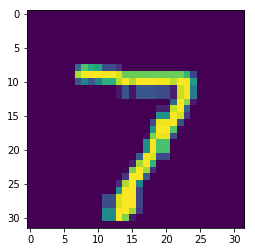

In [42]:

X_test[0]
plt.imshow(X_test[0])
m = 10000

for rotation in range(-45,50,5):
    X_test_ = rotation_imgs(X_test, rotation).reshape(m, 32,32,1).astype('float32') / 255.0
    result = model.evaluate(x=X_test_, y=y_test,verbose=0)
    print(result)

for blur in range(8):
    X_test_ = blur_imgs(X_test, blur).reshape(m, 32,32,1).astype('float32') / 255.0
    result = model.evaluate(x=X_test_, y=y_test,verbose=0)
    print(result)
